## Oil Price Forecasting with ARIMA vs Naïve

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

c:\Users\Samneh\Desktop\QuantDay1-14\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = pd.read_csv("./datasets/commodity_prices.csv")

df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [13]:
df_oil = df[['date', 'oil_dubai']]

df_oil['oil_dubai_returns'] = np.log(df_oil['oil_dubai']/df_oil['oil_dubai'].shift(1))

df_oil['oil_dubai_returns'] = df_oil['oil_dubai_returns'].fillna(0)

df_oil.head()

,date,oil_dubai,oil_dubai_returns
0,1960-01-01,1.63,0.0
1,1960-02-01,1.63,0.0
2,1960-03-01,1.63,0.0
3,1960-04-01,1.63,0.0
4,1960-05-01,1.63,0.0


In [ ]:
adf_results =sm.tsa.stattools.adfuller(
    df_oil['oil_dubai_returns'],
    maxlag=20,
    regression='c',
    autolag='AIC',
    store=False,
    regresults=False
    )

for val in adf_results:
    print(val)



-22.01414997683107
0.0
0
755
{'1%': np.float64(-3.4390409569041207), '5%': np.float64(-2.865375732701395), '10%': np.float64(-2.568812543748081)}
-1422.2514708970612


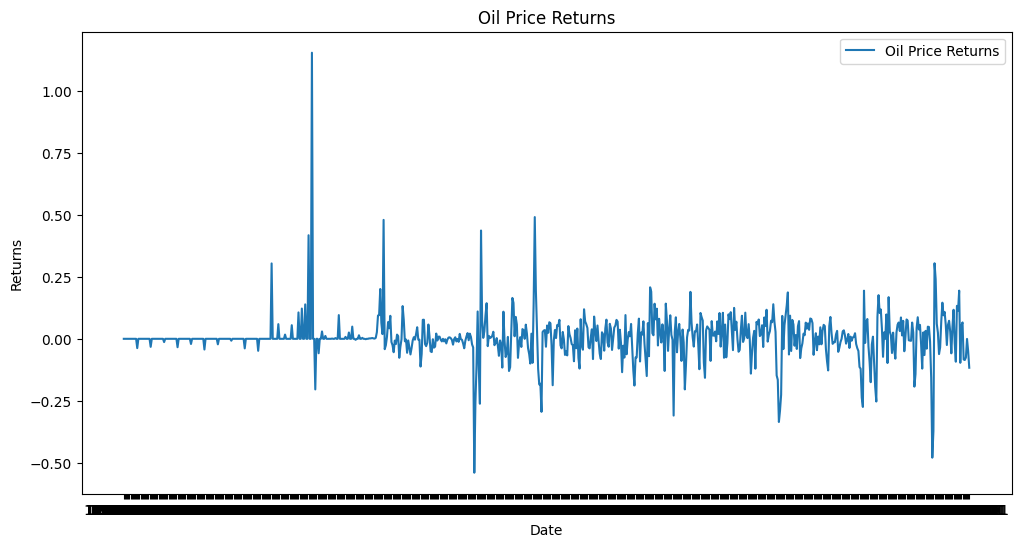

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_oil['date'], df_oil['oil_dubai_returns'], label='Oil Price Returns')
plt.title('Oil Price Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()